# Video Link: https://www.youtube.com/watch?v=H6du_pfuznE&list=PLZoTAELRMXVPGU70ZGsckrMdr0FteeRUi&index=40

In [1]:
import pandas_datareader as pdr

In [2]:
key= '2d37eb44c20433f021179846da06907de576e1a6'

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [4]:
df.head()

close    high      low    open    volume  \
symbol date                                                                   
AAPL   2015-08-27 00:00:00+00:00  112.92  113.24  110.020  112.25  84616056   
       2015-08-28 00:00:00+00:00  113.29  113.31  111.540  112.17  53164407   
       2015-08-31 00:00:00+00:00  112.76  114.53  112.000  112.13  56229271   
       2015-09-01 00:00:00+00:00  107.72  111.88  107.360  110.18  76845860   
       2015-09-02 00:00:00+00:00  112.34  112.34  109.131  110.00  61888812   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
AAPL   2015-08-27 00:00:00+00:00  104.335919  104.631593  101.656374   
       2015-08-28 00:00:00+00:00  104.677792  104.696271  103.060825   
       2015-08-31 00:00:00+00:00  104.188082  105.823528  103.485856   
       2015-09-01 00:00:00+00:00   99.531218  103.374979   99.198585   
       2015-09-02 00:00:00+00:00  103.800010  103.800010  100.834955   

                                     adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                    
AAPL   2015-08-27 00:00:00+00:00  103.716852   84616056      0.0          1.0  
       2015-08-28 00:00:00+00:00  103.642933   53164407      0.0          1.0  
       2015-08-31 00:00:00+00:00  103.605974   56229271      0.0          1.0  
       2015-09-01 00:00:00+00:00  101.804211   76845860      0.0          1.0  
       2015-09-02 00:00:00+00:00  101.637895   61888812      0.0          1.0

In [5]:
df.to_csv('AAPL.csv')

In [6]:
import pandas as pd

In [7]:
data= pd.read_csv('AAPL.csv')
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-08-27 00:00:00+00:00,112.92,113.24,110.020,112.25,84616056,104.335919,104.631593,101.656374,103.716852,84616056,0.0,1.0
1,AAPL,2015-08-28 00:00:00+00:00,113.29,113.31,111.540,112.17,53164407,104.677792,104.696271,103.060825,103.642933,53164407,0.0,1.0
2,AAPL,2015-08-31 00:00:00+00:00,112.76,114.53,112.000,112.13,56229271,104.188082,105.823528,103.485856,103.605974,56229271,0.0,1.0
3,AAPL,2015-09-01 00:00:00+00:00,107.72,111.88,107.360,110.18,76845860,99.531218,103.374979,99.198585,101.804211,76845860,0.0,1.0
4,AAPL,2015-09-02 00:00:00+00:00,112.34,112.34,109.131,110.00,61888812,103.800010,103.800010,100.834955,101.637895,61888812,0.0,1.0


In [8]:
data.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2020-08-18 00:00:00+00:00,462.25,464.000,456.0300,457.410,26408385,462.25,464.000,456.0300,457.410,26408385,0.0,1.0
1253,AAPL,2020-08-19 00:00:00+00:00,462.83,468.650,462.4400,463.933,36384502,462.83,468.650,462.4400,463.933,36384502,0.0,1.0
1254,AAPL,2020-08-20 00:00:00+00:00,473.10,473.568,462.9335,463.000,31726797,473.10,473.568,462.9335,463.000,31726797,0.0,1.0
1255,AAPL,2020-08-21 00:00:00+00:00,497.48,499.472,477.0000,477.050,84513660,497.48,499.472,477.0000,477.050,84513660,0.0,1.0
1256,AAPL,2020-08-24 00:00:00+00:00,503.43,515.140,495.7450,514.790,86484442,503.43,515.140,495.7450,514.790,86484442,0.0,1.0


In [10]:
df1=data.reset_index()['close']

In [11]:
df1

0       112.92
1       113.29
2       112.76
3       107.72
4       112.34
         ...  
1252    462.25
1253    462.83
1254    473.10
1255    497.48
1256    503.43
Name: close, Length: 1257, dtype: float64

In [12]:
df1.isna().sum()

0

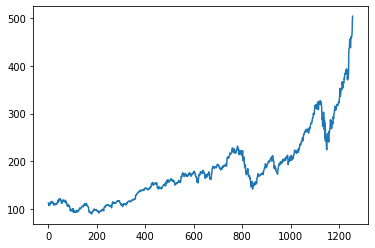

In [13]:
import matplotlib.pyplot as plt
plt.plot(df1)

# LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [14]:
import numpy as np

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
##splitting dataset into train and test split. Since the data is in Sequential manner we cannot use train_test_val
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
# Data Preprocessing: COnverting the data into timestamp.
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [89]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 200
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [90]:
print(X_train.shape), print(y_train.shape)

(616, 200)
(616,)


(None, None)

In [91]:
print(X_test.shape), print(ytest.shape)

(239, 200)
(239,)


(None, None)

In [92]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [93]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [97]:
#Stack LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(200,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [98]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 200, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 200, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
10/10 [==============================] - 6s 555ms/step - loss: 0.0112 - val_loss: 0.0378
Epoch 2/100
10/10 [==============================] - 5s 464ms/step - loss: 0.0024 - val_loss: 0.0149
Epoch 3/100
10/10 [==============================] - 5s 500ms/step - loss: 0.0011 - val_loss: 0.0142
Epoch 4/100
10/10 [==============================] - 5s 511ms/step - loss: 5.2062e-04 - val_loss: 0.0033
Epoch 5/100
10/10 [==============================] - 6s 557ms/step - loss: 3.5716e-04 - val_loss: 0.0035
Epoch 6/100
10/10 [==============================] - 4s 438ms/step - loss: 3.2907e-04 - val_loss: 0.0059
Epoch 7/100
10/10 [==============================] - 4s 414ms/step - loss: 2.9740e-04 - val_loss: 0.0065
Epoch 8/100
10/10 [==============================] - 4s 400ms/step - loss: 2.7892e-04 - val_loss: 0.0054
Epoch 9/100
10/10 [==============================] - 4s 411ms/step - loss: 2.6820e-04 - val_loss: 0.0052
Epoch 10/100
10/10 [==============================] - 4s 404ms/step

10/10 [==============================] - 4s 375ms/step - loss: 1.4461e-04 - val_loss: 0.0026
Epoch 79/100
10/10 [==============================] - 4s 374ms/step - loss: 1.2799e-04 - val_loss: 0.0025
Epoch 80/100
10/10 [==============================] - 4s 374ms/step - loss: 1.2541e-04 - val_loss: 0.0042
Epoch 81/100
10/10 [==============================] - 4s 377ms/step - loss: 1.2939e-04 - val_loss: 0.0016
Epoch 82/100
10/10 [==============================] - 4s 380ms/step - loss: 1.2592e-04 - val_loss: 0.0020
Epoch 83/100
10/10 [==============================] - 4s 376ms/step - loss: 1.2226e-04 - val_loss: 0.0012
Epoch 84/100
10/10 [==============================] - 4s 373ms/step - loss: 1.4131e-04 - val_loss: 0.0032
Epoch 85/100
10/10 [==============================] - 4s 374ms/step - loss: 1.2218e-04 - val_loss: 0.0020
Epoch 86/100
10/10 [==============================] - 4s 375ms/step - loss: 1.1844e-04 - val_loss: 0.0021
Epoch 87/100
10/10 [==============================] - 4s 37

In [100]:
import tensorflow as tf

In [101]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [102]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [103]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

161.56926688910883

In [104]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

298.465371243594

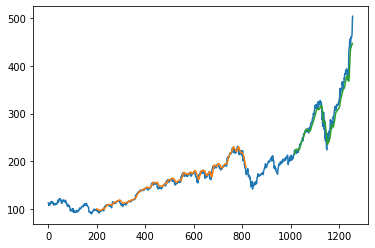

In [106]:
### Plotting 
# shift train predictions for plotting
look_back=200
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [107]:
len(test_data)

440

In [108]:
# Taking previous 100 days data
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [109]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [110]:
#Previous 100 days data fro, 
len(temp_input)

100

In [111]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.89052683]
101
1 day input [0.36570723 0.41668886 0.40932969 0.42540367 0.43005156 0.44278487
 0.47619163 0.46984919 0.47532015 0.46590331 0.45169334 0.43097146
 0.44968409 0.44709385 0.46631485 0.466799   0.45568762 0.47783776
 0.49253189 0.4810816  0.49098259 0.50163403 0.50906582 0.51659445
 0.53206323 0.54387664 0.53516183 0.5260597  0.53063497 0.52620494
 0.5437556  0.53934978 0.55409233 0.54833087 0.55326926 0.54804038
 0.55138105 0.55171996 0.55096952 0.56043477 0.56404173 0.56835072
 0.56157254 0.5837953  0.58854003 0.61403084 0.63545474 0.59444673
 0.60146699 0.61161006 0.63361495 0.63242877 0.63276768 0.62790191
 0.65005205 0.66859522 0.65293277 0.6645041  0.63736716 0.65709652
 0.66440727 0.66273693 0.66273693 0.68631533 0.68350723 0.7045196
 0.70848968 0.7101116  0.70582682 0.72112615 0.72758963 0.71594568
 0.71405747 0.7337142  0.72056937 0.72320802 0.680336   0.67810889
 0.69936333 0.68428188 0.70159045 0.71272604 0.81023506 0.83616161
 0.84320608 0.84705512 0.8842383  

8 day output [[0.8486323]]
9 day input [0.47532015 0.46590331 0.45169334 0.43097146 0.44968409 0.44709385
 0.46631485 0.466799   0.45568762 0.47783776 0.49253189 0.4810816
 0.49098259 0.50163403 0.50906582 0.51659445 0.53206323 0.54387664
 0.53516183 0.5260597  0.53063497 0.52620494 0.5437556  0.53934978
 0.55409233 0.54833087 0.55326926 0.54804038 0.55138105 0.55171996
 0.55096952 0.56043477 0.56404173 0.56835072 0.56157254 0.5837953
 0.58854003 0.61403084 0.63545474 0.59444673 0.60146699 0.61161006
 0.63361495 0.63242877 0.63276768 0.62790191 0.65005205 0.66859522
 0.65293277 0.6645041  0.63736716 0.65709652 0.66440727 0.66273693
 0.66273693 0.68631533 0.68350723 0.7045196  0.70848968 0.7101116
 0.70582682 0.72112615 0.72758963 0.71594568 0.71405747 0.7337142
 0.72056937 0.72320802 0.680336   0.67810889 0.69936333 0.68428188
 0.70159045 0.71272604 0.81023506 0.83616161 0.84320608 0.84705512
 0.8842383  0.8572224  0.87286064 0.84039798 0.87559612 0.89496236
 0.89396984 0.8910649  0.90

18 day output [[0.7772896]]
19 day input [0.49253189 0.4810816  0.49098259 0.50163403 0.50906582 0.51659445
 0.53206323 0.54387664 0.53516183 0.5260597  0.53063497 0.52620494
 0.5437556  0.53934978 0.55409233 0.54833087 0.55326926 0.54804038
 0.55138105 0.55171996 0.55096952 0.56043477 0.56404173 0.56835072
 0.56157254 0.5837953  0.58854003 0.61403084 0.63545474 0.59444673
 0.60146699 0.61161006 0.63361495 0.63242877 0.63276768 0.62790191
 0.65005205 0.66859522 0.65293277 0.6645041  0.63736716 0.65709652
 0.66440727 0.66273693 0.66273693 0.68631533 0.68350723 0.7045196
 0.70848968 0.7101116  0.70582682 0.72112615 0.72758963 0.71594568
 0.71405747 0.7337142  0.72056937 0.72320802 0.680336   0.67810889
 0.69936333 0.68428188 0.70159045 0.71272604 0.81023506 0.83616161
 0.84320608 0.84705512 0.8842383  0.8572224  0.87286064 0.84039798
 0.87559612 0.89496236 0.89396984 0.8910649  0.90031228 0.90171633
 0.92657774 0.98559636 1.         0.89052683 0.89948559 0.90058017
 0.8960849  0.88827449

27 day output [[0.7444945]]
28 day input [0.5260597  0.53063497 0.52620494 0.5437556  0.53934978 0.55409233
 0.54833087 0.55326926 0.54804038 0.55138105 0.55171996 0.55096952
 0.56043477 0.56404173 0.56835072 0.56157254 0.5837953  0.58854003
 0.61403084 0.63545474 0.59444673 0.60146699 0.61161006 0.63361495
 0.63242877 0.63276768 0.62790191 0.65005205 0.66859522 0.65293277
 0.6645041  0.63736716 0.65709652 0.66440727 0.66273693 0.66273693
 0.68631533 0.68350723 0.7045196  0.70848968 0.7101116  0.70582682
 0.72112615 0.72758963 0.71594568 0.71405747 0.7337142  0.72056937
 0.72320802 0.680336   0.67810889 0.69936333 0.68428188 0.70159045
 0.71272604 0.81023506 0.83616161 0.84320608 0.84705512 0.8842383
 0.8572224  0.87286064 0.84039798 0.87559612 0.89496236 0.89396984
 0.8910649  0.90031228 0.90171633 0.92657774 0.98559636 1.
 0.89052683 0.89948559 0.90058017 0.8960849  0.88827449 0.87880433
 0.86870193 0.85854346 0.84863228 0.8391251  0.83010465 0.82161617
 0.81368357 0.80631435 0.79950

In [112]:
print(len(lst_output))

30


In [113]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

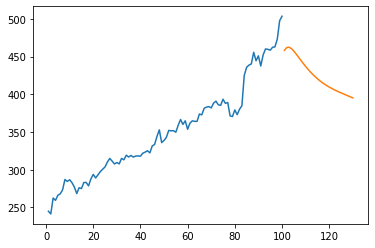

In [114]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

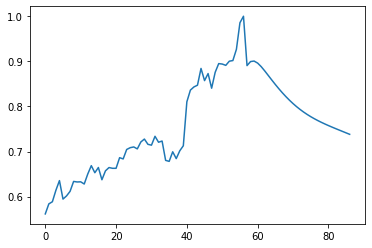

In [115]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])